<a href="https://www.kaggle.com/mishki/deep-learning-for-beginners-cnn-with-pytorch?scriptVersionId=85255208" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In this Notebook I will use the **PyTorch** tensor library to classify the Fashion MNIST dataset using Convolutional Neural Networks.   
As I don't know the background of everyone reading this, I would like to make sure all concepts are familiar. I will therefore start with a presentation of the libraries and methods I am using.

# 1.  __Introduction__

# What is PyTorch


PyTorch is an open source machine learning library. It's mainly used for **computer vision** and **natural language** processing. PyTorch was developed by Facebook and initially released in 2016. If this sparks your interest to learn more about its past and present, I invite you to explore <a href='https://en.wikipedia.org/wiki/PyTorch'>PyTorch's Wikipedia page</a>. 

One more thing you might like to know is that Tesla Autopilot is built on top of PyTorch. And if you are a fan of Tesla, you might enjoy this talk where <a href='https://en.wikipedia.org/wiki/PyTorch'>Andrej Karpathy discusses how Tesla is using PyTorch</a>. 

## How do I learn PyTorch

The answer is, of course, through building something. <a href='https://www.linkedin.com/in/brohrer'>Brandon Rohrer</a> has a nice introductory blog post on <a href='https://e2eml.school/one_step_program_become_data_scientist.html'>becoming a Data Scientist</a> and his "how to" recipe is exactly this: "build stuff". He even has a guide for <a href='https://e2eml.school/choosing_project.html'>choosing a data science project to build.</a>

## Where do I learn PyTorch from

From my experience - and I also found this <a href='https://www.reddit.com/r/MachineLearning/comments/9rvxj6/d_best_bookcourse_to_get_started_with_pytorch/'>Reddit discussion</a> to confirm my beliefs (confirmation bias), the official PyTorch tutorials on https://pytorch.org/ are a great learning resource. If the official website is not to your liking, explore the Reddit discussion and you will find more resources. 

## PyTorch or TensorFlow

You probably heard about TensorFlow. Even if you don't know exactly what it is, it probably rings a bell. Well, it looks like PyTorch and TensorFlow do the same job. 

TensorFlow was developed by Google and it was publicly released one year before PyTorch. But since PyTorch appeared, TensorFlow started to decrease in popularity. 

PyTorch has the reputation of being used predominantly in the academic environment, in research, while TensorFlow was known to be used in production. Things have been changing though, with companies like Tesla and Uber adopting PyTorch.

Check out this article for an ample discussion on <a href='https://realpython.com/pytorch-vs-tensorflow/#pytorch-vs-tensorflow-decision-guide'>PyTorch versus TensorFlow.</a>

# Neural Networks

Everybody is talking about neural networks (NN) these days. And about Deep Learning, which is a particular type of NN.
If you've heard these terms many times, don't feel like you know exactly what they refer to and don't want to read one whole book just to clarify the concepts, here is a quick overview:

Artificial Neural Networks (ANN) and Neural Networks (NN) are the same thing. People use NN because it's shorter than ANN.

I got a good introduction to the topic through the course of Jose Portilla on Udemy - "Python for Data Science and Machine Learning Bootcamp". Section 25 is dedicated to NN. It has a little bit of theory and a lot of practice (though it uses TensorFlow for the practical work). The whole section takes about 5 hours of videos (theory and code along short videos).

If you want to go deeper and understand the Math behind NNs, I used <a href='https://www.linkedin.com/in/andriyburkov/?originalSubdomain=ca'>Andriy Burkov's</a> the <a href='https://www.dropbox.com/s/uh48e6wjs4w13t5/Chapter6.pdf?dl=0'>Hundred-Page Machine Learning Book</a>. Chapter 6 takes you through 17 pages of Neural Networks quick overview. //The author makes the book available on a read first pay later principle. So, if you enjoy the book, you can purchase at the end using any of <a href='http://themlbook.com/'>the methods here.</a>

And if you want to understand exactly how neural nets work and work your way through the backpropagation with pen and paper, read <a href='https://en.wikipedia.org/wiki/Michael_Nielsen'>Michael Nielsen's</a> <a href='http://neuralnetworksanddeeplearning.com/index.html'>Neural Networks and Deep Learning: Introduction to the core principles.</a> 

## Convolutional Neural Networks

Convolutional Neural Networks (CNN) are a subclass of Neural Networks that solve some of the shortcomings of the usual NNs. One main advantage is the reduction of parameters that need to be set through training the model. 

For a full explanation of the benefits of CNN over NN, I recommend section 8 of the course "Python for Data Science and Machine Learning Bootcamp" (by Jose Portilla, on Udemy). This section takes around 5 hours to complete, contains theoetical and code along videos and takes you through examples where you use NN and CNN for the same data. 

# Fashion MNIST CNN with PyTorch

## The MNIST dataset

The Fashion MNIST dataset consists of 60.000 training images and 10.000 test images.   
The examples are 28x28 pixels, greyscale images of clothing items (as the data comes from Zalando, an e-commerce fashion reseller). 
Each item belongs to one of the following categories:    

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

For a complete description of the MNIST dataset, please check <a href='https://www.kaggle.com/zalando-research/fashionmnist'>this page on Kaggle</a>. Check the tab labelled 'Data' and you will see a very detailed description. 

## Standard Imports

We begin by important the usual libraries for a PyTorch project.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, Dataset

import pandas as pd

from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Exploring our data

## 2.1 Reading and examining our data  
We will first use the easy way to read our data: we know we have the data in csv files. The easiest way I know for reading a CSV is to use the read_csv function from pandas. This will read the contents of each file into a pandas DataFrame.  

Later we will see that we're better off using the <a href='https://pytorch.org/docs/stable/data.html'>DataLoader</a> class from the PyTorch library. And I will explain why. But, for now, let us stick to the familiar pandas DataFrame just to see what kind of data we are dealing with a how it is organised.

Read the training and test data into pandas DataFrames.

In [2]:
train_data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv',sep=',')
test_data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv', sep = ',')

class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

Let's explore our data.   
Since we read our data as a pandas DataFrame, we'll use the usual head() method.

In [3]:
print("train_data dimensions: ", train_data.shape)
train_data.head(3)

train_data dimensions:  (60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


Notice that we are dealing with 60.000 rows x 785 columns.   
That's because we have 60.000 training examples.   

But why is the row length equal to 785 ? Look at the column names in the table above. It looks like our images are flattened out into a long one-dimensional array. We know our images are 28x28 pixels. If you flatten one image out (collapse into one dimension instead of two), it gives us one row of length 784.      
And the first column represents the label of that image (one digit, from 0 to 9, for each of the 10 clothing item types we have in this dataset).  
These add up to the 785 which is our row's length.

How large is our test set ?

In [4]:
print("train_data dimensions: ", test_data.shape)
test_data.head(3)

train_data dimensions:  (10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0


## 2.2 Examine one image

Shape: (784,) 
Label: 2 
Class: Sweater


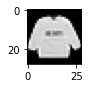

In [5]:
#let's look at the first example in our training dataset 
label = train_data.iloc[0,0]
image = train_data.iloc[0,1:]
print('Shape:', image.shape, '\nLabel:', label, '\nClass:', class_names[label])

torch_tensor = torch.tensor(image.values)
plt.figure(figsize=(1,1))
plt.imshow(torch_tensor.reshape((28,28)), cmap="gray");

## 2.3 PyTorch DataLoader

Remember I mentioned in section 2.1 that we're only using pandas to explore the data temporarily and that later we will look at the tools PyTorch offers for loading data. The time has come.

### Loading data in batches
Usually, Data Scientists handle huge amounts of data. You may think that 60.000 training examples is not that much and you're right. But this is just our playground now. And we are preparing for real world data analysis, so it's good to create good habits from the start. Besides having huge amounts of data to read, we also have a large number of parameters to train in our CNN model. We will compute the exact number of parameter later. For the time being, keep in mind that we will be training around 60.000 network parameters.   

The bottom line is that we want to save memory space. For this purpose, PyTorch offers <a href="https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader">DataLoader</a>, which allows us to load data in batches. That is, instead of loading all 60.000 examples in memory at the same time, we will load {batch_size} examples at a time. I will use a batch_size of 10 just because I've seen it used so many times, but feel free to experiment. 

### Custom Dataset
The common way to use DataLoader is like this:

> from torchvision import datasets, transforms   
> from torch.utils.data import DataLoader  
> transform = transforms.ToTensor()   
> train_data = datasets.FashionMNIST(root='/kaggle/input/', train=True, download=True, transform=transform)  
> train_loader = DataLoader(train_data, batch_size=10, shuffle=True)

This method uses <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a> to download an MNIST dataset. On the first call, the dataset is downloaded in the indicated folder. Subsequent calls will check if the data is already downloaded and will use the local version.   
The problem is that this method expects to find in the local fonder something like this two files: Fashion-MNIST/processed/training.pt and Fashion-MNIST/processed/test.pt. In our case, we only have 2 csv files.   

We therefore need to transform our dataset (the csv file) into the kind of data that DataLoader expects.

Checking what kind of data DataLoader expects:
- check the <a href="https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader">official Python documentation for DataLoader.</a>
- looks like we need to convert our data to a 'Dataset'. Check <a href="https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset">PyTorch documentation for Dataset</a>. 
- Dataset is an abstract class (more appropriately called an "interface") --> we need to implement our own class to extend it. 
- According to the documentation, our class must overwrite __getitem__() and it should (optionally) overwrite __getlen__()




In [6]:
class FashionMNISTDataset(Dataset):
    def __init__(self, file_path):
        data = pd.read_csv(file_path,sep=',')
        labels = torch.tensor(data['label'].values)
        images = torch.tensor(data.drop(columns=['label']).values)
        
        #convert the pandas DataFrames to torch tensors
        #separate tensors for labels and for features (our image pixels)
        self.labels = torch.tensor(labels)
        self.images = torch.reshape(images,(-1,1, 28,28))
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.images[idx],self.labels[idx]

In [7]:
train_data = FashionMNISTDataset('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
train_loader = DataLoader(train_data, batch_size = 10, shuffle = True) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


A few observations on the code above:
- It might not be necessary now, but it's a good practice to always shuffle the training data. Some datasets may have all the exemplars of a class grouped together (e.g. all the t-shirt images, then all the shoes images etc). We don't want our CNN to train on a single class, then on another class etc. 
- I use batch size 10 just because it seems to be fashionable, no other reasons for this particular number for me.

Let's check our custom DataLoader. We'll take the first batch of 10 examples and print them as images. Let's see if the image looks ok and if it matched its associated label. 

Shape of our chunk of images:  torch.Size([10, 1, 28, 28])
Labels: [0 0 8 0 0 5 0 6 9 7]
Classes: T-shirt T-shirt Bag T-shirt T-shirt Sandal T-shirt Shirt Boot Sneaker


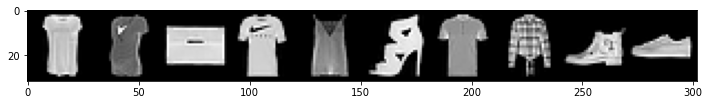

In [8]:
for images,labels in train_loader: 
    break
    
#check our data format
print("Shape of our chunk of images: ",images.shape)
    
# Print the labels
print('Labels:', labels.numpy())
print('Classes:', *np.array([class_names[i] for i in labels]))

img = make_grid(images, nrow=10) 

plt.figure(figsize=(12,6))
plt.imshow(np.transpose(img.numpy(), (1, 2, 0))); #we need to transpose our images because plt.imshow expects another shape

Good, our custom DataLoder seems to work fine.   
Let's load the test data too.

In [9]:
test_data = FashionMNISTDataset('/kaggle/input/fashionmnist/fashion-mnist_test.csv')
test_loader = DataLoader(test_data, batch_size = 10, shuffle = False)  

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


# 3. Creating our own Convolutional Neural Network model

To create our own CNN in PyTorch, we need to define our own class as a subclass of __Module__. If you feel the need to read more about this procedure, check out the <a href="https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_module.html">Custom nn Modules examples in the official PyTorch documentation</a>.

## 3.1 The structure of a CNN

Regular NN models would conain fully connected layers with flat inputs (1 dimensional).  
Let's a little talk about what is specific to CNN and not found in regular NNs in general.
CNNs use:
- convolutional layers made up of image filters which are based on image kernels 
    - to see image kernels in action, check out this <a href="https://setosa.io/ev/image-kernels/">visual explanation of image kernels </a>
- pooling layers, which are used to reduce the dimensionality of convolutional layers outputs.

## 3.2 Defining our CNN model

In our CNN model, we will implement this architecture:
1. convolutional layer 1 (1,6,3,1) -> 
2. pooling layer 1 (2, 2) -> 
3. convolutional  layer 2 (6,16,3,1) -> 
4. pooling layer 2 (2,2) -> 
5. fully connected layer 1 or fc1 (5x5x16, 120) -> 
6. fully connected layer 2 or fc2 (120,84) -> 
7. fully connected layer 3 or fc3 (84,10), which is our output layer.

The data in parathesis represent the parameters of each layer and here is an explanation:
1. convolutional layer 1 has parameters set to (1,6,3,1) because it has: 
    - 1 input channel (because our data is greyscale, so we only have one color channel)
    - 6 output channels (these are esentially the number of filters I arbitrarily chose for this layer)
    - 3 is the kernel size (in effect, this means a 3x3 kernel)
    - 1 is the step size
2. pooling layer 1 has a kernel of size 2 (2x2) and a step of 2 (also referred to as 'stride')
3. convolutional layer 2 will have: 6 input channels (because conv1 was outputting 6 channels and we pull them into conv2), 16 output channels (16 filters), a kernel size of 3 (again, this means 3x3) and a step size of 1
4. pooling layer 2 also has a 2x2 kernel and a stride of 2
5. fc1 has:
    - an input of size 5x5x16. The 16 comes from the number of channels we chose for the previous layer, conv2. The 5x5 comes from the dimensionality reduction that is created through the use of the previous layers. By using 2 convolutional layers and 2 pooling layers, we go from 28x28 input data to 5x5 matrices. 
    - and the layer has 100 neurons (I arbitrarily chose this number)
6. I bet you know by now why fc2 is (120,84)
7. and you also know why fc3 has these settings

*if in doubt whether I selected 120 and 84 numbers of neurons in the 1st and 2nd fully connected layers for some reason, know that I did not. These are just numbers I picked out. How to decide on the dimensions of neural networks layers is beyond the scope of this tutorial.


In [10]:
class myCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1, 5*5*16) # we need to flatten our data to 1D before inputting it to our fully connected layers. 
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        return F.log_softmax(X, dim=1)
    
torch.manual_seed(101)
model = myCNN()
model

myCNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Some clarifications on the code above:
- the output of the convolutional layers is passed through a Rectified Linear Unit activation function. If you need to read more about <a href="https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning">why and how the ReLU function is used in NNs, there is a short Notebook here on Kaggle.</a>
- for the pooling layers, I choose a max 2D pooling function and you can <a href="https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d">read more about it here.</a>
- for the output layer, the log soft max is the most commonly used function for multiclass classification situations.


## 3.3 Parameters downsize with CNN

I mentioned earlier that one advantage of CNN over regular NN is the decrease in the number of parameters that need to be trained. 

Let's see if it's true. If we used a regular NN with the same fullyconnected layers: fc1(120 neurons), fc2(84 neurons) and fc3(10 neurons), we would need to train this numer of parameters:
+ 784 (the input size = 28\*28 images) * 120 neurons = 94.080 weights for fc1
+ 120 biases for fc1
+ 120 * 84 = 10.080 weights for fc2
+ 120 biases for fc2
+ 84 * 10 = 840 weights for fc3
+ 10 biases for fc3
------------
= 105.250 total number of parameters to train

And how many parameters do we need to train in our CNN ? The following code will compute the number:

In [11]:
def param_count(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(item)
    print('Total: ', sum(params))
    
param_count(model)

54
6
864
16
48000
120
10080
84
840
10
Total:  60074


**Therefore, by using our CNN instead of an ANN with the same fully connected layers, we have to train 60.074 parameters instead of 105.250**

# 4. Training our CNN

Before starting to train our model, we need to define a loss function and an optimizer.

Since we are dealing with a problem of classification, I will use the <a href="https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html">nn.CrossEntropyLoss</a> function for the criterion on which to evaluate how well the model is performing.

For the optimizer, I will use Adam, which is the most widely used algorithm for training deep learning networks.

In [12]:
eval_crit = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## 4.1 Let's train for 10 epochs

In [13]:
type(len(train_data))

int

In [14]:
epochs = 10

import time
start = time.time()

"""
Let's keep track of the training losses by appending them to a vector
At the end of training, we will plot the losses on the training set and on the test set for each epoch
This will help us see if there is a potential to improve results if we train for more epochs.
"""
train_losses = []
test_losses = []

#Let's also keep track of the number of correct classifications in each epoch
train_correct = []
test_correct = []


for i in range(epochs):
    
    train_correct_pred = 0
    test_correct_pred = 0
    
    for X_train, y_train in train_loader:
        #apply our model
        y_pred = model(X_train.float())
        
        #compute the loss
        loss = eval_crit(y_pred, y_train)

        """
        Count the number of correctly predicted items:
        y_pred contains the probability for the training examples to belong to each of the 10 possible classes
        therefore, in order to get the predicted class for each example, we need to do this for each row:
        find the maximum probabiliy and return its column number 
        """
        predicted_classes = torch.max(y_pred.data, 1)[1]
        train_correct_pred += (predicted_classes == y_train).sum() #add the number of correctly predicted items in this batch
        
        #update the model parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_losses.append(loss)
    train_correct.append(train_correct_pred.item()*100/len(train_data))
    
    print(f'Epoch: {i+1} Loss: {loss:7.5} Accuracy: {train_correct_pred.item()*100/len(train_data):4.2f} ({train_correct_pred} correct out of {len(train_data)})')
    
    #Evaluate the performance of the currect model on the test set
    #we first set our model into eval mode
    with torch.no_grad():
        for X_test, y_test in test_loader:
            #apply our model
            y_pred = model(X_test.float())
            
            predicted_classes = torch.max(y_pred.data, 1)[1]
            test_correct_pred += (predicted_classes == y_test).sum()
   
        loss = eval_crit(y_pred, y_test)
        test_losses.append(loss)
        test_correct.append(test_correct_pred.item()*100/len(test_data))
    

print(f'Duration of training (min): {(time.time()-start)/60}')

Epoch: 1 Loss: 0.50452 Accuracy: 71.36 (42814 correct out of 60000)
Epoch: 2 Loss:  1.7068 Accuracy: 73.34 (44007 correct out of 60000)
Epoch: 3 Loss:  1.5366 Accuracy: 74.03 (44420 correct out of 60000)
Epoch: 4 Loss:   1.105 Accuracy: 74.44 (44664 correct out of 60000)
Epoch: 5 Loss: 0.64486 Accuracy: 74.57 (44741 correct out of 60000)
Epoch: 6 Loss:  1.7886 Accuracy: 74.91 (44946 correct out of 60000)
Epoch: 7 Loss: 0.10567 Accuracy: 75.06 (45039 correct out of 60000)
Epoch: 8 Loss: 0.45613 Accuracy: 75.14 (45087 correct out of 60000)
Epoch: 9 Loss:   1.346 Accuracy: 75.42 (45250 correct out of 60000)
Epoch: 10 Loss: 0.60771 Accuracy: 75.38 (45229 correct out of 60000)
Duration of training (min): 3.9378878633181253


## 4.2 Plot the loss and accuracy during training

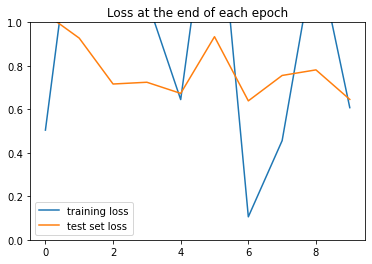

In [15]:
plt.figure(figsize=(6,4))
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='test set loss')
plt.title('Loss at the end of each epoch')
plt.ylim(0,1)
plt.legend();

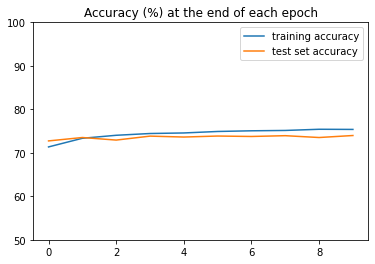

In [16]:
plt.figure(figsize=(6,4))
plt.plot(train_correct, label='training accuracy')
plt.plot(test_correct, label='test set accuracy')
plt.title('Accuracy (%) at the end of each epoch')
plt.ylim(50,100)
plt.legend();

Let's save this model for now.

In [17]:
torch.save(model.state_dict(), 'FashionMNIST-CNN-Model-Batch10.pt')

## 4.3 Considerations on loss fluctuations 

Let's have a look at the first plot from section 4.2. Notice how the losses fluctuate between epochs during training ?   
We are trying to train a network of ~ 60k parameters.  
We are training it on 60k samples.   
And we crunch training data in batches of 10. After each batch of 10, we evaluate the loss and update our parameters.   
Maybe our batch size is too little and this leads to the instability in loss.  
Let'look at the interraction of batch size and losses by using a batch_size of 100 and one of 4.



In [18]:
def train_model(batch_size=10):

    train_data = FashionMNISTDataset('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
    train_loader = DataLoader(train_data, batch_size = batch_size, shuffle = True) 

    test_data = FashionMNISTDataset('/kaggle/input/fashionmnist/fashion-mnist_test.csv')
    test_loader = DataLoader(test_data, batch_size = batch_size, shuffle = True) 

    torch.manual_seed(101)
    model = myCNN()

    eval_crit = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    epochs = 10

    start = time.time()

    """
    Let's keep track of the training losses by appending them to a vector
    At the end of training, we will plot the losses on the training set and on the test set for each epoch
    This will help us see if there is a potential to improve results if we train for more epochs.
    """
    train_losses = []
    test_losses = []

    #Let's also keep track of the number of correct classifications in each epoch
    train_correct = []
    test_correct = []


    for i in range(epochs):

        train_correct_pred = 0
        test_correct_pred = 0

        for X_train, y_train in train_loader:
            #apply our model
            y_pred = model(X_train.float())

            #compute the loss
            loss = eval_crit(y_pred, y_train)

            """
            Count the number of correctly predicted items:
            y_pred contains the probability for the training examples to belong to each of the 10 possible classes
            therefore, in order to get the predicted class for each example, we need to do this for each row:
            find the maximum probabiliy and return its column number 
            """
            predicted_classes = torch.max(y_pred.data, 1)[1]
            train_correct_pred += (predicted_classes == y_train).sum() #add the number of correctly predicted items in this batch

            #update the model parameters
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        train_losses.append(loss)
        train_correct.append(train_correct_pred.item()*100/len(train_data))

        print(f'Epoch: {i+1} Loss: {loss:7.5} Accuracy: {train_correct_pred.item()*100/len(train_data):4.2f} ({train_correct_pred} correct out of {len(train_data)})')

        #Evaluate the performance of the currect model on the test set
        #we first set our model into eval mode
        model.eval()
        with torch.no_grad():
            for X_test, y_test in test_loader:
                #apply our model
                y_pred = model(X_test.float())

                predicted_classes = torch.max(y_pred.data, 1)[1]
                test_correct_pred += (predicted_classes == y_test).sum()

            loss = eval_crit(y_pred, y_test)
            test_losses.append(loss)
            test_correct.append(test_correct_pred.item()*100/len(test_data))
        model.train()
    
    print(f'Duration of training (min): {(time.time()-start)/60}')
    
    plt.figure(figsize=(6,4))
    plt.plot(train_losses, label='training loss')
    plt.plot(test_losses, label='test set loss')
    plt.title('Loss at the end of each epoch')
    plt.ylim(0,0.8)
    plt.legend();
    
    plt.figure(figsize=(6,4))    
    plt.plot(train_correct, label='training accuracy')
    plt.plot(test_correct, label='test set accuracy')
    plt.title('Accuracy (%) at the end of each epoch')
    plt.ylim(50,100)
    plt.legend();

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


Epoch: 1 Loss:  0.4898 Accuracy: 78.00 (46801 correct out of 60000)
Epoch: 2 Loss: 0.34142 Accuracy: 86.83 (52100 correct out of 60000)
Epoch: 3 Loss: 0.23602 Accuracy: 88.43 (53057 correct out of 60000)
Epoch: 4 Loss:  0.4595 Accuracy: 89.30 (53578 correct out of 60000)
Epoch: 5 Loss:  0.3138 Accuracy: 90.05 (54030 correct out of 60000)
Epoch: 6 Loss: 0.43225 Accuracy: 90.74 (54444 correct out of 60000)
Epoch: 7 Loss: 0.31584 Accuracy: 91.16 (54697 correct out of 60000)
Epoch: 8 Loss: 0.24974 Accuracy: 91.60 (54959 correct out of 60000)
Epoch: 9 Loss: 0.30292 Accuracy: 92.12 (55275 correct out of 60000)
Epoch: 10 Loss: 0.20953 Accuracy: 92.50 (55501 correct out of 60000)
Duration of training (min): 1.3959544102350872


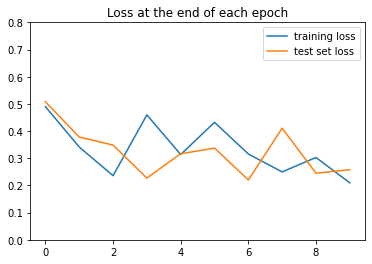

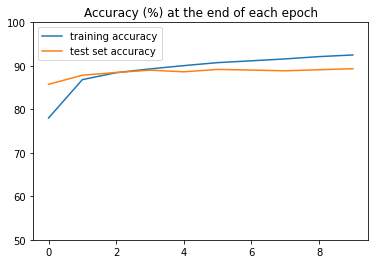

In [19]:
train_model(100)
torch.save(model.state_dict(), 'FashionMNIST-CNN-Model-Batch100.pt')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


Epoch: 1 Loss:  2.3053 Accuracy: 61.02 (36613 correct out of 60000)
Epoch: 2 Loss: 0.49778 Accuracy: 78.91 (47343 correct out of 60000)
Epoch: 3 Loss: 0.025948 Accuracy: 81.91 (49144 correct out of 60000)
Epoch: 4 Loss: 0.33718 Accuracy: 86.56 (51937 correct out of 60000)
Epoch: 5 Loss: 0.76363 Accuracy: 86.97 (52184 correct out of 60000)
Epoch: 6 Loss: 0.039489 Accuracy: 87.15 (52289 correct out of 60000)
Epoch: 7 Loss: 0.14534 Accuracy: 87.30 (52378 correct out of 60000)
Epoch: 8 Loss:  1.9873 Accuracy: 87.43 (52456 correct out of 60000)
Epoch: 9 Loss: 0.037326 Accuracy: 87.69 (52615 correct out of 60000)
Epoch: 10 Loss:  1.3207 Accuracy: 87.32 (52393 correct out of 60000)
Duration of training (min): 10.300407874584199


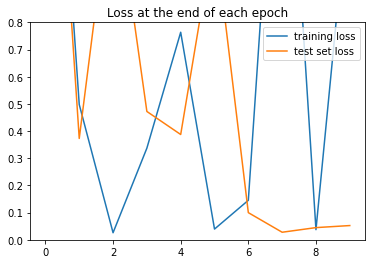

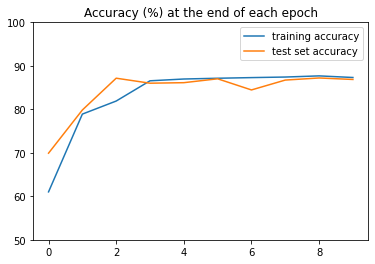

In [20]:
train_model(4)
torch.save(model.state_dict(), 'FashionMNIST-CNN-Model-Batch4.pt')

It looks like both the losses and the accuracy look better for the model trained of batches of 10.   
So we will load this model from the file where we've saved it and use it for a final evaluation on the test data.

In [21]:
#instantiate the model
final_model = myCNN()

#load the saved parameters
final_model.load_state_dict(torch.load('FashionMNIST-CNN-Model-Batch10.pt'))

<All keys matched successfully>

# 5. Evaluating our CNN model

In [22]:
final_model.eval() #sets our model into evaluation mode <-- check PyTorch documentation
with torch.no_grad(): #prevents adjusting the network parameters by mistake
    corr_pred = 0
    for X_test, y_test in test_loader:
        y_pred = final_model(X_test.float())
        # for each test example, the prediction is a vector of 10 items. Item number k represents the probability of this
        # example belonging to class k. To obtain the class label from this vector, we extract the position of the item
        # with the highest value in the 10-item array. 
        labels_pred = torch.max(y_pred,1)[1] #get the labels for the predictions
        corr_pred += (labels_pred == y_test).sum()
        
print(f'Accuracy: {corr_pred.item()*100/(len(test_data))}%')

Accuracy: 73.98%


That's it, congrats for getting to the end. I hope you enjoyed this Notebook ! Please let me know your thoughts in the comments.